In [2]:
import pandas as pd

# Load datasets
train = pd.read_csv(r"C:\Users\hakathon\temperature_data\train.csv")
test = pd.read_csv(r"C:\Users\hakathon\temperature_data\test.csv")
sample_submission = pd.read_csv(r"C:\Users\hakathon\temperature_data\sample_submission.csv")

# Display basic information about the datasets
print("Train Dataset Shape:", train.shape)
print("Test Dataset Shape:", test.shape)
print("Sample Submission Shape:", sample_submission.shape)

# Preview the datasets
print("\nTrain Dataset Head:")
print(train.head())

print("\nTest Dataset Head:")
print(test.head())

print("\nSample Submission Head:")
print(sample_submission.head())


Train Dataset Shape: (56000, 15)
Test Dataset Shape: (14088, 14)
Sample Submission Shape: (5, 2)

Train Dataset Head:
   ID        Datetime  City_ID  Particulate_matter SO2_concentration  \
0   0  01/01/17 14:00        0                14.0             40.12   
1   1  01/01/17 15:00        0                12.0             65.59   
2   2  01/01/17 16:00        0                 6.0             58.87   
3   3  01/01/17 17:00        0                 5.0             84.67   
4   4  01/01/17 18:00        0                 5.0             83.66   

  O3_concentration CO_concentration  NO2_concentration  Presure  Dew_point  \
0               85           600.14              38.55   1024.5      -21.4   
1               84          2082.38              96.09   1025.1      -22.1   
2               83          1475.88             111.09   1025.3      -24.6   
3               84          2448.53              67.59   1026.2      -25.5   
4               77          2224.61              95.86   10

In [3]:
print("\nMissing Values in Train Dataset:")
print(train.isnull().sum())

print("\nMissing Values in Test Dataset:")
print(test.isnull().sum())



Missing Values in Train Dataset:
ID                      0
Datetime                0
City_ID                 0
Particulate_matter    660
SO2_concentration       0
O3_concentration      802
CO_concentration        0
NO2_concentration       0
Presure                 0
Dew_point               0
Precipitation           0
Anonymous_X1          216
Wind_speed              0
Moisture_percent        0
Temperature             0
dtype: int64

Missing Values in Test Dataset:
ID                      0
Datetime                0
City_ID                 0
Particulate_matter    333
SO2_concentration       0
O3_concentration      366
CO_concentration        0
NO2_concentration       0
Presure                 0
Dew_point               0
Precipitation           0
Anonymous_X1           64
Wind_speed              0
Moisture_percent        0
dtype: int64


In [4]:
print(train.dtypes)
print(test.dtypes)


ID                      int64
Datetime               object
City_ID                 int64
Particulate_matter    float64
SO2_concentration      object
O3_concentration       object
CO_concentration       object
NO2_concentration     float64
Presure               float64
Dew_point             float64
Precipitation         float64
Anonymous_X1          float64
Wind_speed            float64
Moisture_percent      float64
Temperature           float64
dtype: object
ID                      int64
Datetime               object
City_ID                 int64
Particulate_matter    float64
SO2_concentration      object
O3_concentration       object
CO_concentration       object
NO2_concentration     float64
Presure               float64
Dew_point             float64
Precipitation         float64
Anonymous_X1          float64
Wind_speed            float64
Moisture_percent      float64
dtype: object


In [5]:
# List of columns to convert
columns_to_convert = ['SO2_concentration', 'O3_concentration', 'CO_concentration']

for col in columns_to_convert:
    train[col] = pd.to_numeric(train[col], errors='coerce')
    test[col] = pd.to_numeric(test[col], errors='coerce')


In [6]:
print(train.dtypes)
print(test.dtypes)
test.shape

ID                      int64
Datetime               object
City_ID                 int64
Particulate_matter    float64
SO2_concentration     float64
O3_concentration      float64
CO_concentration      float64
NO2_concentration     float64
Presure               float64
Dew_point             float64
Precipitation         float64
Anonymous_X1          float64
Wind_speed            float64
Moisture_percent      float64
Temperature           float64
dtype: object
ID                      int64
Datetime               object
City_ID                 int64
Particulate_matter    float64
SO2_concentration     float64
O3_concentration      float64
CO_concentration      float64
NO2_concentration     float64
Presure               float64
Dew_point             float64
Precipitation         float64
Anonymous_X1          float64
Wind_speed            float64
Moisture_percent      float64
dtype: object


(14088, 14)

In [7]:
# Recheck missing values
print("Missing values in train:\n", train.isnull().sum())
print("Missing values in test:\n", test.isnull().sum())

# Fill missing values using mean imputation (or replace with KNN if preferred)
columns_with_missing = ['Particulate_matter', 'O3_concentration', 'Anonymous_X1']

for col in columns_with_missing:
   train[col] = train[col].fillna(train[col].mean())
   test[col] = test[col].fillna(test[col].mean())
test.shape

Missing values in train:
 ID                      0
Datetime                0
City_ID                 0
Particulate_matter    660
SO2_concentration      47
O3_concentration      913
CO_concentration       60
NO2_concentration       0
Presure                 0
Dew_point               0
Precipitation           0
Anonymous_X1          216
Wind_speed              0
Moisture_percent        0
Temperature             0
dtype: int64
Missing values in test:
 ID                      0
Datetime                0
City_ID                 0
Particulate_matter    333
SO2_concentration      10
O3_concentration      397
CO_concentration       20
NO2_concentration       0
Presure                 0
Dew_point               0
Precipitation           0
Anonymous_X1           64
Wind_speed              0
Moisture_percent        0
dtype: int64


(14088, 14)

In [8]:
import pandas as pd

# Load the datasets
train_file_path = train  # Replace with the actual path to your train CSV file
test_file_path = test    # Replace with the actual path to your test CSV file

# Read the CSV files
train_df = train_file_path
test_df = test_file_path

# General Information about the Train Dataset
print("Train Dataset Shape:", train_df.shape)
print("\nTrain Data Types:\n", train_df.dtypes)

# Check for Missing Values in Train Dataset
train_missing_values = train_df.isnull().sum()
print("\nMissing Values in Train Dataset:\n", train_missing_values)

# Summary Statistics for Numerical Features in Train Dataset
print("\nSummary Statistics (Numerical Features) in Train Dataset:\n", train_df.describe())

# General Information about the Test Dataset
print("\nTest Dataset Shape:", test_df.shape)
print("\nTest Data Types:\n", test_df.dtypes)

# Check for Missing Values in Test Dataset
test_missing_values = test_df.isnull().sum()
print("\nMissing Values in Test Dataset:\n", test_missing_values)

# Summary Statistics for Numerical Features in Test Dataset
print("\nSummary Statistics (Numerical Features) in Test Dataset:\n", test_df.describe())


Train Dataset Shape: (56000, 15)

Train Data Types:
 ID                      int64
Datetime               object
City_ID                 int64
Particulate_matter    float64
SO2_concentration     float64
O3_concentration      float64
CO_concentration      float64
NO2_concentration     float64
Presure               float64
Dew_point             float64
Precipitation         float64
Anonymous_X1          float64
Wind_speed            float64
Moisture_percent      float64
Temperature           float64
dtype: object

Missing Values in Train Dataset:
 ID                     0
Datetime               0
City_ID                0
Particulate_matter     0
SO2_concentration     47
O3_concentration       0
CO_concentration      60
NO2_concentration      0
Presure                0
Dew_point              0
Precipitation          0
Anonymous_X1           0
Wind_speed             0
Moisture_percent       0
Temperature            0
dtype: int64

Summary Statistics (Numerical Features) in Train Dataset:
 

In [9]:
 # Fill missing values in both train and test datasets

# Replace missing values in SO2_concentration and CO_concentration with their respective column mean
train_df['SO2_concentration'] = train_df['SO2_concentration'].fillna(train_df['SO2_concentration'].mean())
train_df['CO_concentration'] = train_df['CO_concentration'].fillna(train_df['CO_concentration'].mean())

test_df['SO2_concentration'] = test_df['SO2_concentration'].fillna(test_df['SO2_concentration'].mean())
test_df['CO_concentration'] = test_df['CO_concentration'].fillna(test_df['CO_concentration'].mean())

# Verify missing values are handled
print("\nMissing Values in Train Dataset after handling:\n", train_df.isnull().sum())
print("\nMissing Values in Test Dataset after handling:\n", test_df.isnull().sum())
test_df.shape


Missing Values in Train Dataset after handling:
 ID                    0
Datetime              0
City_ID               0
Particulate_matter    0
SO2_concentration     0
O3_concentration      0
CO_concentration      0
NO2_concentration     0
Presure               0
Dew_point             0
Precipitation         0
Anonymous_X1          0
Wind_speed            0
Moisture_percent      0
Temperature           0
dtype: int64

Missing Values in Test Dataset after handling:
 ID                    0
Datetime              0
City_ID               0
Particulate_matter    0
SO2_concentration     0
O3_concentration      0
CO_concentration      0
NO2_concentration     0
Presure               0
Dew_point             0
Precipitation         0
Anonymous_X1          0
Wind_speed            0
Moisture_percent      0
dtype: int64


(14088, 14)

Analyzing Train Dataset...


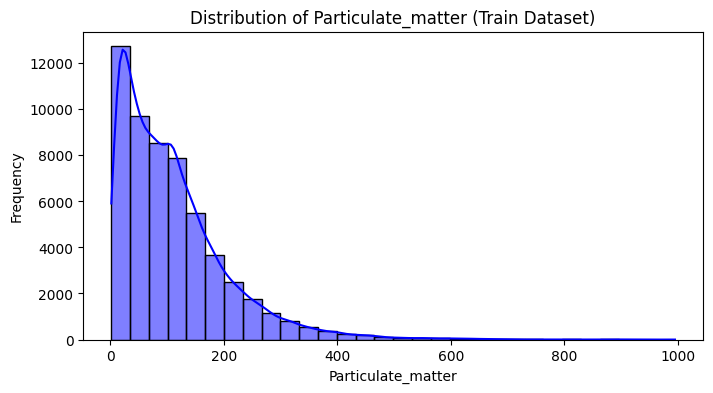

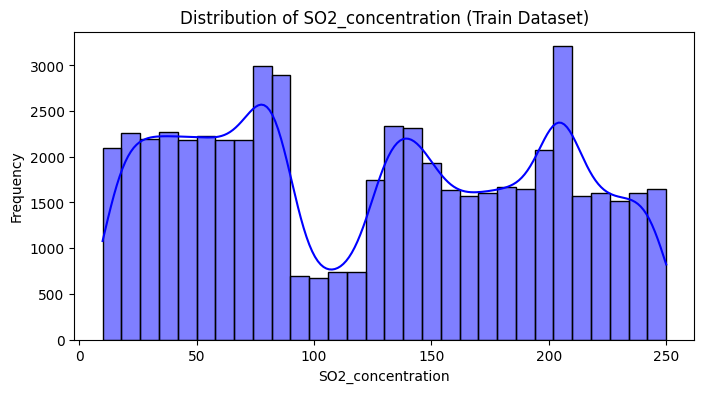

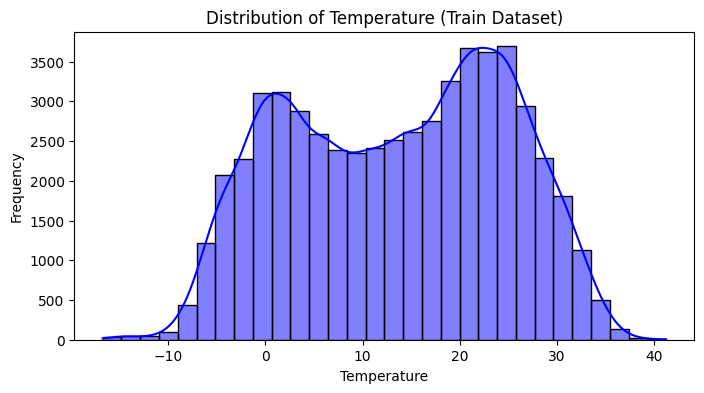

C:\Users\HARSHIL\AppData\Local\Temp\ipykernel_13744\1877802043.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="viridis")


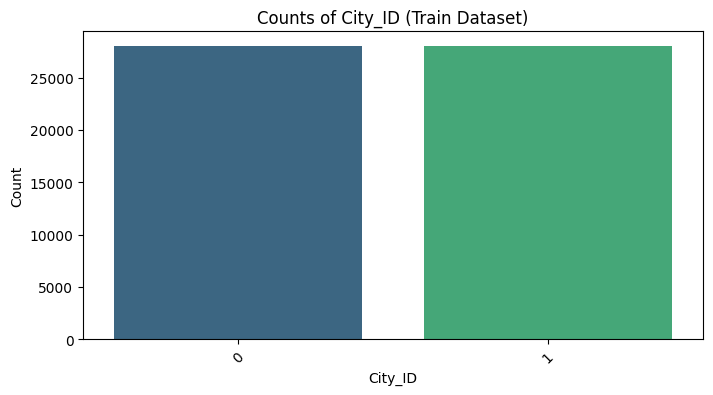

Analyzing Test Dataset...


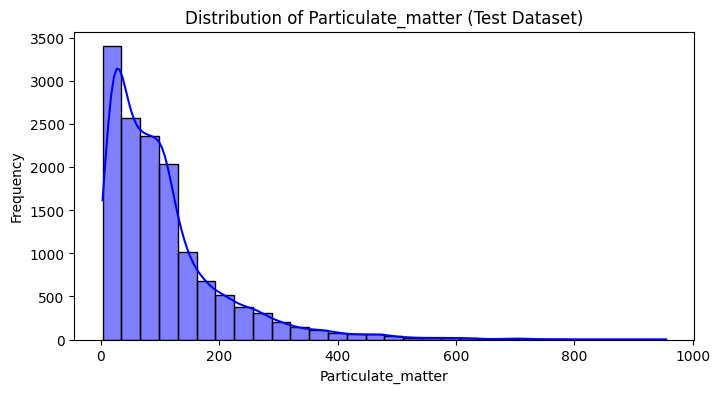

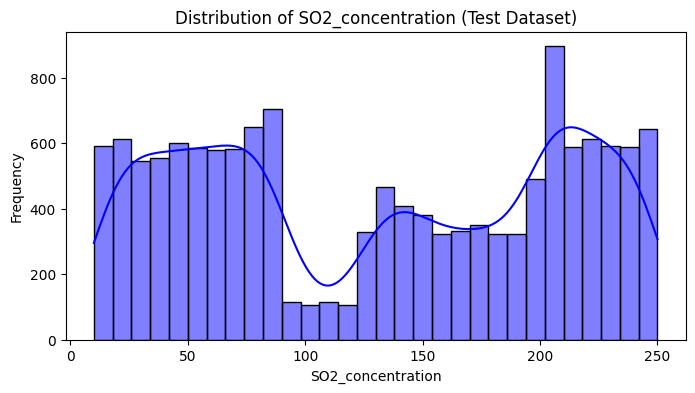

C:\Users\HARSHIL\AppData\Local\Temp\ipykernel_13744\1877802043.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="viridis")


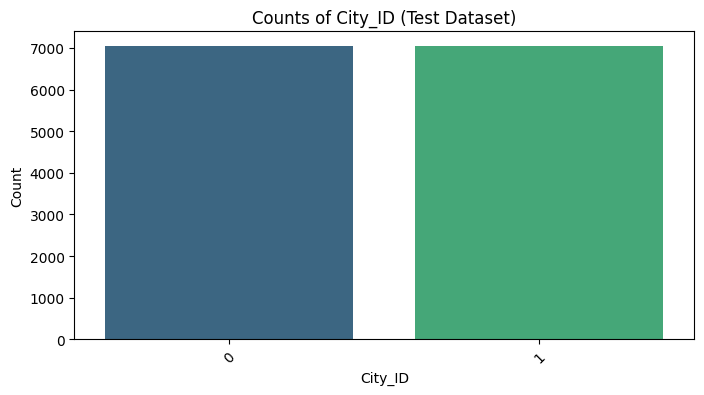

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify numerical and categorical features
numerical_features = ['Particulate_matter', 'SO2_concentration', 'Temperature']
categorical_features = ['City_ID', 'Weekday', 'Month']

# Function to plot numerical features
def plot_numerical_features(df, dataset_name):
    for feature in numerical_features:
        if feature in df.columns:
            plt.figure(figsize=(8, 4))
            sns.histplot(df[feature].dropna(), kde=True, bins=30, color='blue')
            plt.title(f'Distribution of {feature} ({dataset_name} Dataset)')
            plt.xlabel(feature)
            plt.ylabel('Frequency')
            plt.show()

# Function to plot categorical features
def plot_categorical_features(df, dataset_name):  # Fixed typo here
    for feature in categorical_features:
        if feature in df.columns:
            plt.figure(figsize=(8, 4))
            sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="viridis")
            plt.title(f'Counts of {feature} ({dataset_name} Dataset)')
            plt.xticks(rotation=45)
            plt.xlabel(feature)
            plt.ylabel('Count')
            plt.show()

# Plot for Train Dataset
print("Analyzing Train Dataset...")
plot_numerical_features(train_df, "Train")
plot_categorical_features(train_df, "Train")

# Plot for Test Dataset
print("Analyzing Test Dataset...")
plot_numerical_features(test_df, "Test")
plot_categorical_features(test_df, "Test")


Correlation Analysis for Train Dataset:


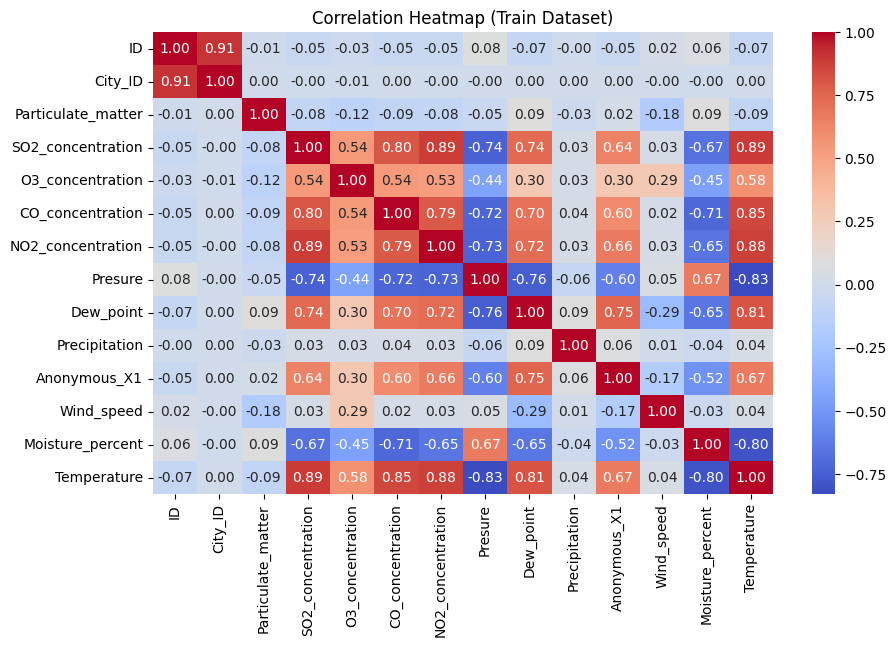

Correlation Analysis for Test Dataset:


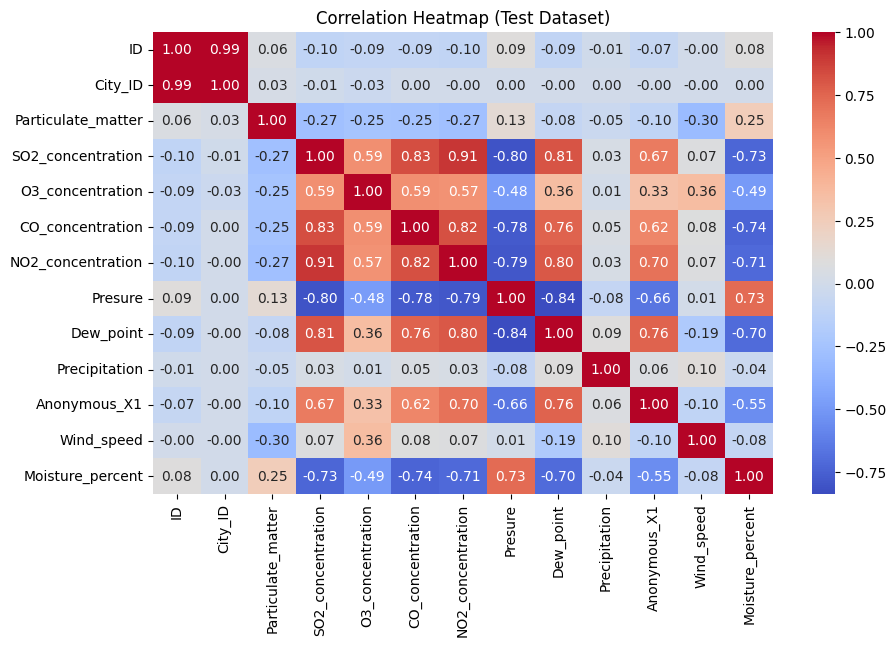

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot correlation heatmap
def plot_correlation_heatmap(df, dataset_name):
    # Select only numerical columns
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    correlation_matrix = df[numerical_cols].corr()

    # Plotting the Correlation Heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title(f'Correlation Heatmap ({dataset_name} Dataset)')
    plt.show()

# Plot for Train Dataset
print("Correlation Analysis for Train Dataset:")
plot_correlation_heatmap(train_df, "Train")

# Plot for Test Dataset
print("Correlation Analysis for Test Dataset:")
plot_correlation_heatmap(test_df, "Test")


In [12]:
invalid_entries = test_df[~test_df['Datetime'].str.match(r'^\d{2}/\d{2}/\d{2} \d{2}:\d{2}$', na=False)]
print(invalid_entries)
print(f"Number of invalid rows: {len(invalid_entries)}")


          ID Datetime  City_ID  Particulate_matter  SO2_concentration  \
153    28153      -80        0           83.000000             162.96   
437    28437      -80        0           83.000000             156.90   
525    28525      -80        0           37.000000             223.73   
700    28700      -80        0          190.000000             210.93   
791    28791      -80        0           36.000000             213.71   
1310   29310      -80        0          179.000000             229.17   
1486   29486      -80        0           92.000000             201.00   
1999   29999      -80        0          161.000000             233.87   
2693   30693      -80        0           97.000000             162.88   
2915   30915      -80        0           26.000000             172.14   
3335   31335      -80        0           79.000000             195.43   
3378   31378      -80        0           37.000000             109.64   
3696   31696      -80        0           91.000000 

In [13]:
# Function to validate, clean, and extract datetime features
def process_datetime_features(df, dataset_name):
    print(f"\nProcessing Datetime Features for {dataset_name} Dataset...")

    # Step 1: Identify invalid datetime values
    invalid_entries = df[~df['Datetime'].str.match(r'^\d{2}/\d{2}/\d{2} \d{2}:\d{2}$', na=False)]
    print(f"Invalid Entries in {dataset_name} 'Datetime' Column:")
    print(invalid_entries)

    # Step 2: Replace invalid entries with NaT
    df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')

    # Step 3: Drop rows with invalid datetime values
    df = df.dropna(subset=['Datetime'])

    # Step 4: Extract features from valid datetime values
    df['Datetime'] = pd.to_datetime(df['Datetime'])  # Ensure valid datetime format
    df['Month'] = df['Datetime'].dt.month
    df['Weekday'] = df['Datetime'].dt.weekday
    df['Hour'] = df['Datetime'].dt.hour

    print(f"Processed {dataset_name} Dataset: {len(invalid_entries)} invalid entries handled.")
    return df

# Apply the function to train and test datasets
train_df = process_datetime_features(train_df, "Train")
test_df = process_datetime_features(test_df, "Test")
test_df.shape


Processing Datetime Features for Train Dataset...
Invalid Entries in Train 'Datetime' Column:
          ID Datetime  City_ID  Particulate_matter  SO2_concentration  \
659      659      -80        0           32.000000              78.94   
695      695      -80        0           73.000000              60.65   
949      949      -80        0           20.000000             122.82   
1365    1365      -80        0           67.000000             183.01   
2713    2713      -80        0           38.000000             190.31   
...      ...      ...      ...                 ...                ...   
52560  59604     -150        1          105.000000              82.12   
53562  60606     -150        1           45.000000              35.46   
54048  61092     -150        1           93.000000              22.08   
54893  61937     -150        1           18.000000             125.90   
55824  62868     -150        1          110.548066             204.27   

       O3_concentration  CO_

C:\Users\HARSHIL\AppData\Local\Temp\ipykernel_13744\538497075.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
C:\Users\HARSHIL\AppData\Local\Temp\ipykernel_13744\538497075.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Datetime'] = pd.to_datetime(df['Datetime'])  # Ensure valid datetime format
C:\Users\HARSHIL\AppData\Local\Temp\ipykernel_13744\538497075.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

Processed Train Dataset: 106 invalid entries handled.

Processing Datetime Features for Test Dataset...
Invalid Entries in Test 'Datetime' Column:
          ID Datetime  City_ID  Particulate_matter  SO2_concentration  \
153    28153      -80        0           83.000000             162.96   
437    28437      -80        0           83.000000             156.90   
525    28525      -80        0           37.000000             223.73   
700    28700      -80        0          190.000000             210.93   
791    28791      -80        0           36.000000             213.71   
1310   29310      -80        0          179.000000             229.17   
1486   29486      -80        0           92.000000             201.00   
1999   29999      -80        0          161.000000             233.87   
2693   30693      -80        0           97.000000             162.88   
2915   30915      -80        0           26.000000             172.14   
3335   31335      -80        0           79.000000

C:\Users\HARSHIL\AppData\Local\Temp\ipykernel_13744\538497075.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Datetime'] = pd.to_datetime(df['Datetime'])  # Ensure valid datetime format
C:\Users\HARSHIL\AppData\Local\Temp\ipykernel_13744\538497075.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Datetime'].dt.month
C:\Users\HARSHIL\AppData\Local\Temp\ipykernel_13744\538497075.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

(14040, 17)

In [14]:
# Function to process datetime conversion with specific format for both train and test datasets
def convert_datetime(df, dataset_name):
    print(f"\nProcessing 'Datetime' Column for {dataset_name} Dataset...")

    # Replace invalid datetime strings with NaT using a specific format
    df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce', format='%d/%m/%y %H:%M')

    # Print the number of NaT entries (invalid datetimes)
    invalid_entries = df['Datetime'].isna().sum()
    print(f"Number of invalid Datetime entries (converted to NaT): {invalid_entries}")

    return df

# Apply the function to both train and test datasets
train_df = convert_datetime(train_df, "Train")
test_df = convert_datetime(test_df, "Test")



Processing 'Datetime' Column for Train Dataset...
Number of invalid Datetime entries (converted to NaT): 0

Processing 'Datetime' Column for Test Dataset...
Number of invalid Datetime entries (converted to NaT): 0


C:\Users\HARSHIL\AppData\Local\Temp\ipykernel_13744\1223344934.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce', format='%d/%m/%y %H:%M')
C:\Users\HARSHIL\AppData\Local\Temp\ipykernel_13744\1223344934.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce', format='%d/%m/%y %H:%M')


In [15]:
# Function to process datetime conversion with specific format for both train and test datasets
def convert_datetime(df, dataset_name):
    print(f"\nProcessing 'Datetime' Column for {dataset_name} Dataset...")

    # Use .loc to avoid SettingWithCopyWarning
    df.loc[:, 'Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce', format='%d/%m/%y %H:%M')

    # Print the number of NaT entries (invalid datetimes)
    invalid_entries = df['Datetime'].isna().sum()
    print(f"Number of invalid Datetime entries (converted to NaT): {invalid_entries}")

    return df

# Apply the function to both train and test datasets
train_df = convert_datetime(train_df, "Train")
test_df = convert_datetime(test_df, "Test")



Processing 'Datetime' Column for Train Dataset...
Number of invalid Datetime entries (converted to NaT): 0

Processing 'Datetime' Column for Test Dataset...
Number of invalid Datetime entries (converted to NaT): 0



Generating Plots for Train Dataset...


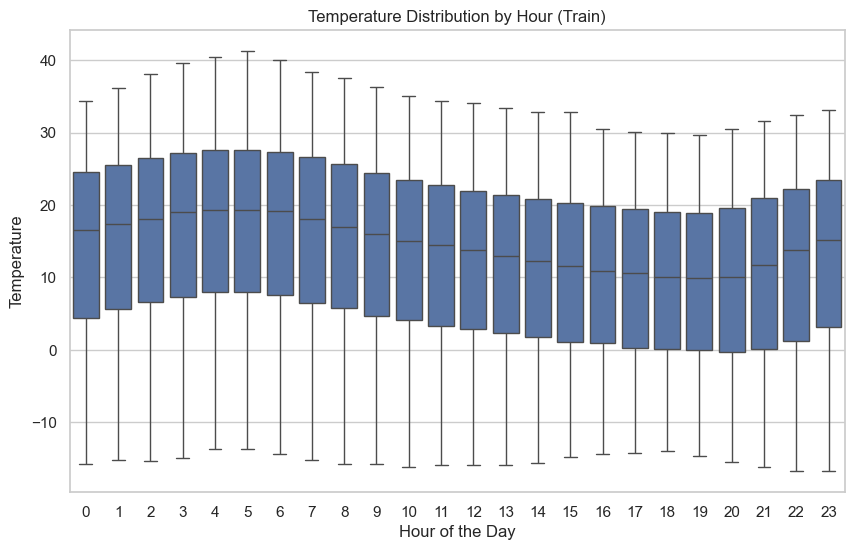

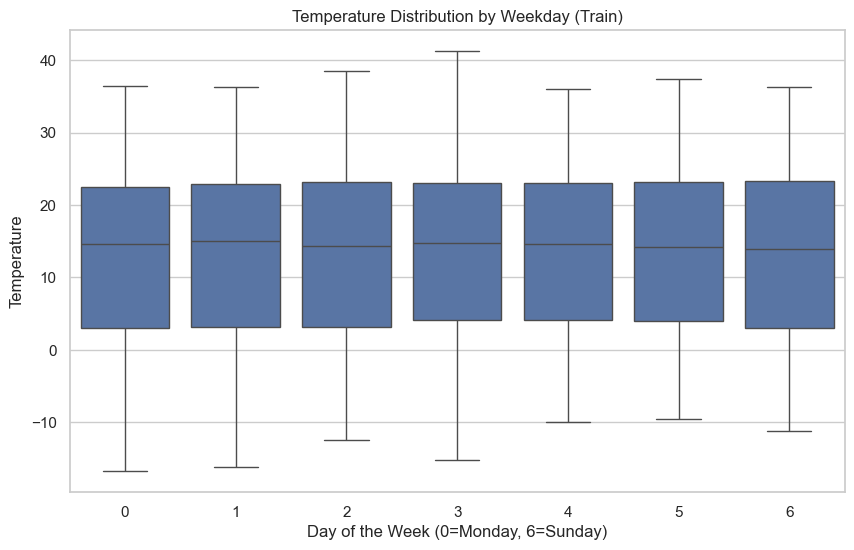

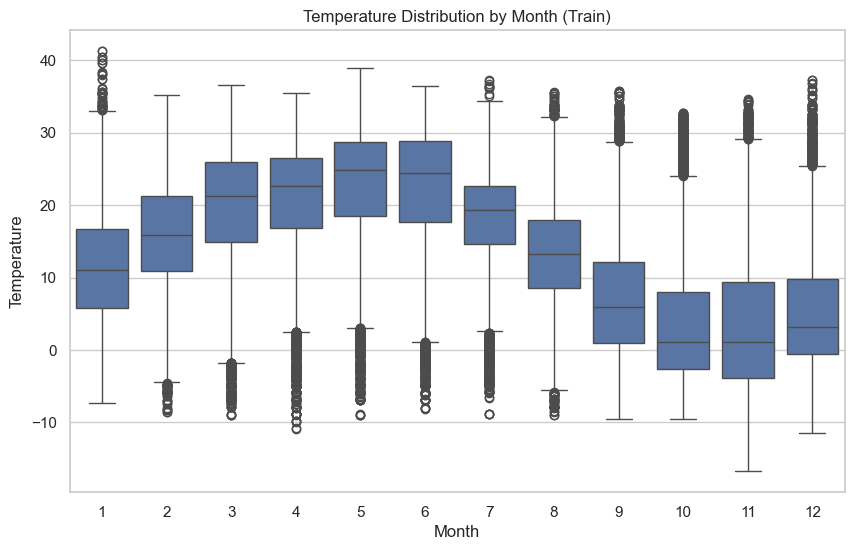


Generating Plots for Test Dataset...
'Temperature' column is not present in the Test dataset, skipping plots.


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style for plots
sns.set(style="whitegrid")

# Function to plot Temperature vs. Time-based Features for both datasets
def plot_temperature_distribution(df, dataset_name):
    print(f"\nGenerating Plots for {dataset_name} Dataset...")
    
    if 'Temperature' in df.columns:
        # Plot Temperature vs. Hour
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Hour', y='Temperature', data=df)
        plt.title(f'Temperature Distribution by Hour ({dataset_name})')
        plt.xlabel('Hour of the Day')
        plt.ylabel('Temperature')
        plt.show()

        # Plot Temperature vs. Weekday
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Weekday', y='Temperature', data=df)
        plt.title(f'Temperature Distribution by Weekday ({dataset_name})')
        plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
        plt.ylabel('Temperature')
        plt.show()

        # Plot Temperature vs. Month
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Month', y='Temperature', data=df)
        plt.title(f'Temperature Distribution by Month ({dataset_name})')
        plt.xlabel('Month')
        plt.ylabel('Temperature')
        plt.show()
    else:
        print(f"'Temperature' column is not present in the {dataset_name} dataset, skipping plots.")

# Apply the function to both train and test datasets
plot_temperature_distribution(train_df, "Train")
plot_temperature_distribution(test_df, "Test")



Statistical Summary for Train Dataset:
                 ID                       Datetime       City_ID  \
count  55894.000000                          55894  55894.000000   
mean   31520.923140  2018-08-11 22:52:26.699109120      0.500018   
min        0.000000            2017-01-01 14:00:00      0.000000   
25%    13997.250000            2017-10-20 01:15:00      0.000000   
50%    35044.500000            2018-08-07 19:00:00      1.000000   
75%    49044.750000            2019-05-26 13:45:00      1.000000   
max    63043.000000            2020-12-03 23:00:00      1.000000   
std    19297.948058                            NaN      0.500004   

       Particulate_matter  SO2_concentration  O3_concentration  \
count        55894.000000       55894.000000      55894.000000   
mean           110.585703         124.845096         58.186769   
min              2.000000          10.010000          0.214200   
25%             39.000000          60.800000         13.000000   
50%             9

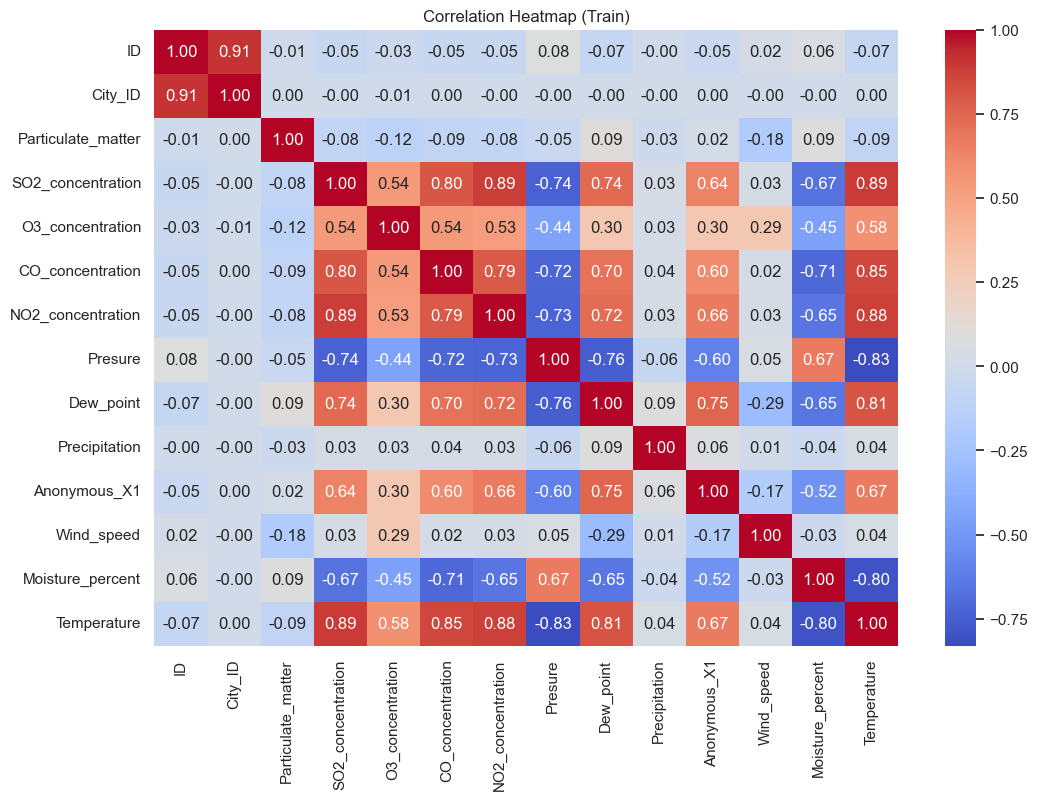


Statistical Summary for Test Dataset:
                 ID                       Datetime       City_ID  \
count  14040.000000                          14040  14040.000000   
mean   49040.827493  2020-07-21 22:49:12.307692544      0.499929   
min    28000.000000            2020-01-04 00:00:00      0.000000   
25%    31521.750000            2020-05-04 16:00:00      0.000000   
50%    35042.500000            2020-07-22 23:30:00      0.000000   
75%    66561.250000            2020-10-13 15:00:00      1.000000   
max    70087.000000            2021-01-01 13:00:00      1.000000   
std    17639.926586                            NaN      0.500018   

       Particulate_matter  SO2_concentration  O3_concentration  \
count        14040.000000       14040.000000      14040.000000   
mean           106.126024         130.408201         56.642801   
min              3.000000          10.010000          1.000000   
25%             36.000000          58.392500          8.000000   
50%             80

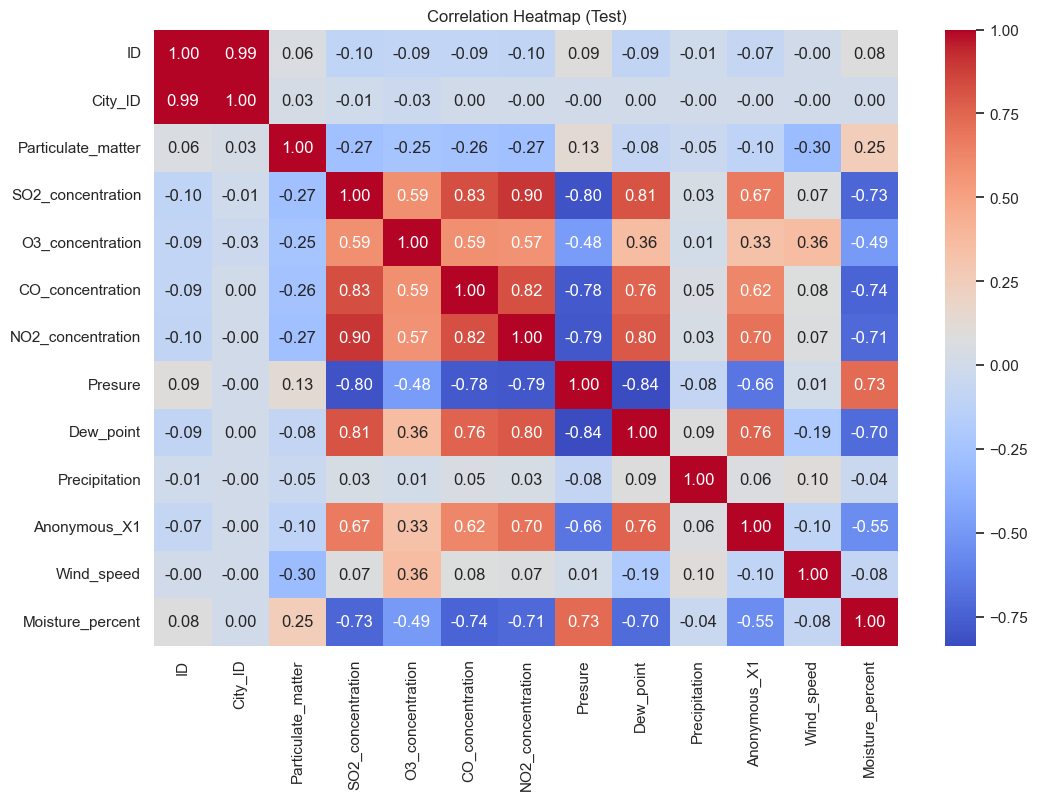

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to generate statistical summary and correlation heatmap for a given dataset
def analyze_dataset(df, dataset_name):
    print(f"\nStatistical Summary for {dataset_name} Dataset:")
    print(df.describe())  # Displaying statistical summary

    # Check correlation between features (only for numerical columns)
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Select numerical columns
    correlation_matrix = df[numerical_cols].corr()

    # Plotting the Correlation Heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap ({dataset_name})')
    plt.show()

# Apply the function to both train and test datasets
analyze_dataset(train_df, "Train")
analyze_dataset(test_df, "Test")


In [18]:
import pandas as pd

# Function to add features to both train and test
def add_features(df):
    # Make sure you're working with a copy to avoid modifying a slice
    df = df.copy()

    # Create additional features
    df['is_weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)  # 1 for Saturday/Sunday
    df['season'] = df['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2]
                                     else 'Spring' if x in [3, 4, 5]
                                     else 'Summer' if x in [6, 7, 8]
                                     else 'Autumn')

    # Encode 'season' using one-hot encoding
    df = pd.get_dummies(df, columns=['season'], drop_first=True)

    # Drop unnecessary columns
    df = df.drop(columns=['Datetime'])

    return df

# Assuming train_df and test_df are already loaded
#train_df = pd.read_csv('train.csv')
#test_df = pd.read_csv('test.csv')

# Apply the function to both train and test datasets
train = add_features(train_df)
test = add_features(test_df)

# Display the first few rows of the updated train and test DataFrames
print("Updated Train DataFrame with New Features:")
print(train.head())

print("Updated Test DataFrame with New Features:")
print(test.head())


Updated Train DataFrame with New Features:
   ID  City_ID  Particulate_matter  SO2_concentration  O3_concentration  \
0   0        0                14.0              40.12              85.0   
1   1        0                12.0              65.59              84.0   
2   2        0                 6.0              58.87              83.0   
3   3        0                 5.0              84.67              84.0   
4   4        0                 5.0              83.66              77.0   

   CO_concentration  NO2_concentration  Presure  Dew_point  Precipitation  \
0            600.14              38.55   1024.5      -21.4            0.0   
1           2082.38              96.09   1025.1      -22.1            0.0   
2           1475.88             111.09   1025.3      -24.6            0.0   
3           2448.53              67.59   1026.2      -25.5            0.0   
4           2224.61              95.86   1027.1      -24.5            0.0   

   ...  Wind_speed  Moisture_percent  Tempe

In [19]:
# Split into features and target
X_train = train.drop(columns=['ID', 'Temperature'])
y_train = train['Temperature']

X_test = test.drop(columns=['ID'])  # Test set does not include target


from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Define the model
xgb_model = XGBRegressor(
    n_estimators=700,
    learning_rate=0.05,
    max_depth=12,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_test = xgb_model.predict(X_test)

# Example of test predictions
print("Test Predictions:", y_pred_test[:10])


Test Predictions: [27.70871  27.06984  23.443962 23.029745 23.273285 23.522526 22.878012
 23.335487 23.62781  23.296638]


In [20]:
# Create submission DataFrame
submission = pd.DataFrame({
    'ID': test['ID'],  # IDs from the test set
    'Temperature': y_pred_test  # Predicted temperatures
})

# Save to CSV
submission.to_csv('submission.csv', index=False)

print("Submission file created: 'submission.csv'")


Submission file created: 'submission.csv'


In [21]:
from sklearn.metrics import mean_squared_error

# Generate predictions for the training set
y_pred_train = xgb_model.predict(X_train)

# Calculate MSE for the training set
train_mse = mean_squared_error(y_train, y_pred_train)

# Calculate the score based on the MSE
train_score = max(0, 100 - train_mse)

# Output the MSE and the score
print(f"Train MSE: {train_mse:.4f}")
print(f"Train Score: {train_score:.2f}")


Train MSE: 0.0084
Train Score: 99.99


In [21]:
# Generate predictions for the test set
y_pred_test = xgb_model.predict(X_test)

# Create the submission dataframe
submission = pd.DataFrame({
    'ID': test_df['ID'],  # 'ID' from the test data
    'Temperature': y_pred_test  # Predictions for 'Temperature'
})

# Save the submission file
submission.to_csv('submission2.csv', index=False)
